In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import RegularPolygon
from matplotlib.collections import LineCollection


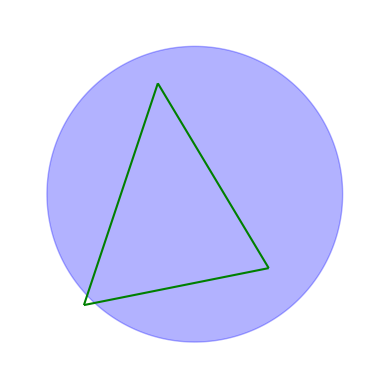

In [6]:
def draw_shapes():
    fig, ax = plt.subplots()

    # Додаємо коло як багатокутник з великою кількістю сторін
    circle = RegularPolygon((0.5, 0.5), numVertices=500, radius=0.4, color='blue', alpha=0.3)
    ax.add_patch(circle)

    # Створимо трикутник з довільними точками і зеленими сторонами
    # Точки трикутника (можна змінити для отримання різних форм)
    triangle_points = np.array([[0.2, 0.2], [0.4, 0.8], [0.7, 0.3]])
    triangle = LineCollection([triangle_points[[0, 1]], triangle_points[[1, 2]], triangle_points[[2, 0]]], colors='green')
    ax.add_collection(triangle)

    # Налаштування осей
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    plt.axis('off')  # Прибираємо осі для кращої візуалізації

    plt.show()

draw_shapes()


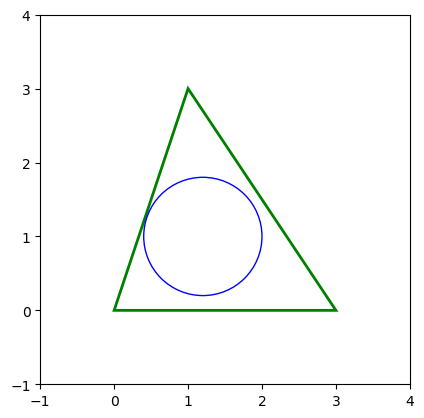

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def draw_circle_in_triangle(ax, radius, center, triangle_vertices):
    """
    Функція для малювання кола, вписаного в трикутник.
    
    Параметри:
    - ax: об'єкт осей matplotlib, на яких буде намальовано зображення.
    - radius: радіус вписаного кола.
    - center: координати центру вписаного кола.
    - triangle_vertices: координати вершин трикутника.
    """
    # Малюємо трикутник
    triangle = plt.Polygon(triangle_vertices, edgecolor='green', fill=None, linewidth=2)
    ax.add_patch(triangle)
    
    # Малюємо коло
    circle = plt.Circle(center, radius, color='blue', fill=False)
    ax.add_patch(circle)
    
    # Налаштування меж осей для наочності
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')

# Створюємо фігуру та осі
fig, ax = plt.subplots()

# Координати вершин трикутника (не рівнобедреного і не рівностороннього)
triangle_vertices = np.array([[0, 0], [3, 0], [1, 3]])

# Центр і радіус вписаного кола (приблизні значення, для демонстрації)
center = [1.2, 1]
radius = 0.8

# Малюємо коло вписане в трикутник
draw_circle_in_triangle(ax, radius, center, triangle_vertices)

plt.show()


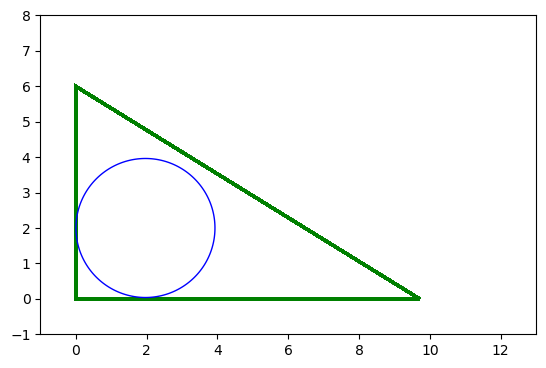

In [8]:
#Task 1

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

# Довжини сторін трикутника
x = 6
a = x 
b = 1.272 * x
c = 1.618 * x

# Створення фігури та осей
fig, ax = plt.subplots()

# Розрахунок висоти трикутника
h = np.sqrt(c**2 - b**2)

def draw_polygon(polygon_center):
    # Розрахунок координат вершин трикутника
    A = np.array([0, 0])
    B = np.array([c, 0])
    C = np.array([0, np.sqrt(c**2 - b**2)])

    # Додавання трикутника
    triangle = Polygon([A, B, C], edgecolor='green', fill=None, linewidth=2)
    ax.add_patch(triangle)

    # Радіус вписаного багатокутника (половина периметру, поділена на півпериметр)
    s = (a + b + c) / 2  # Півпериметр
    polygon_radius = np.sqrt((s - a) * (s - b) * (s - c) / s)

    # Створення апроксимованого багатокутника
    num_vertices = 500
    theta = np.linspace(0, 2*np.pi, num_vertices)
    x_polygon = polygon_center[0] + polygon_radius * np.cos(theta)
    y_polygon = polygon_center[1] + polygon_radius * np.sin(theta)
    polygon_vertices = np.column_stack((x_polygon, y_polygon))

    # Перевірка чи є точки ліворуч від (0, 0)
    if any(vertex[0] < 0 for vertex in polygon_vertices):
        return False
    
    # Додавання апроксимованого багатокутника
    polygon_approx = Polygon(polygon_vertices, edgecolor='blue', facecolor='none')
    ax.add_patch(polygon_approx)

    return True

# Початковий центр вписаного багатокутника
polygon_center = np.array([0, h / 3])

# Переміщення центру вправо на 0.01
polygon_center[0] += 0.01

while not draw_polygon(polygon_center):
    # Якщо є точки ліворуч від (0, 0), то перестроїти
    polygon_center[0] += 0.01

# Налаштування меж осей для наочності
ax.set_xlim(-1, 13)
ax.set_ylim(-1, 8)
ax.set_aspect('equal')

plt.show()


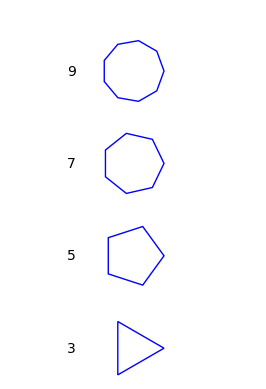

In [26]:
#Task 2: Створити список багатокутників із 9, 7, ..., 3 сторонами. (непарні варіанти)

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

# Створення фігури та осей
fig, ax = plt.subplots()

# Створення списку для збереження багатокутників
polygons = []

# Розмір сторон багатокутників
side_length = 1

# Створення багатокутників з 9 до 3 сторін
sizes = list(range(9, 2, -2))
for i, sides in enumerate(sizes):
    # Розрахунок координат вершин багатокутника
    center = np.array([0, -i * 1.5])  # Центр для розташування багатокутників вертикально з проміжком
    radius = side_length / 2  # Радіус, щоб мати заданий розмір сторін

    theta = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    x_polygon = center[0] + radius * np.cos(theta)
    y_polygon = center[1] + radius * np.sin(theta)
    polygon_vertices = np.column_stack((x_polygon, y_polygon))

    # Додавання багатокутника до списку
    polygons.append(Polygon(polygon_vertices, edgecolor='blue', facecolor='none'))

# Додавання багатокутників на графік та асоціація з числами
for i, polygon in enumerate(polygons):
    ax.add_patch(polygon)
    ax.text(-1, -i * 1.5, str(sizes[i]), ha='center', va='center')

    # Додавання пустої строки
    ax.text(-1, -i * 1.5 - 0.5, '', ha='center', va='center')

# Приховання осей координат
ax.axis('off')

# Внутрішня сітка
ax.set_xticks([])
ax.set_yticks([])

# Налаштування меж осей для наочності
ax.set_xlim(-2, 2)
ax.set_ylim(-len(sizes) * 1.5 + 1, 1)
ax.set_aspect('equal')

plt.show()



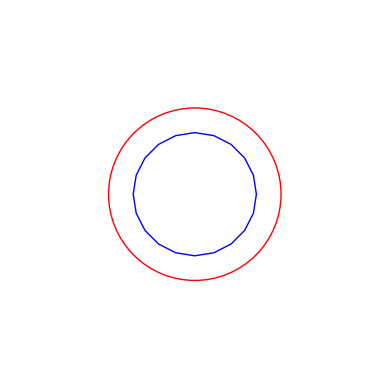

In [41]:
# Task 3: 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle
import numpy as np

# Створення фігури та осей
fig, ax = plt.subplots()

# Розмір сторін багатокутника
side_length_polygon = 0.5

# Кількість сторін багатокутника
num_sides_polygon = 20

# Створення правильного багатокутника
theta_polygon = np.linspace(0, 2 * np.pi, num_sides_polygon, endpoint=False)
x_polygon = side_length_polygon * np.cos(theta_polygon)
y_polygon = side_length_polygon * np.sin(theta_polygon)
polygon_vertices = np.column_stack((x_polygon, y_polygon))

# Створення правильного багатокутника з кількістю сторін num_sides_polygon
polygon = Polygon(polygon_vertices, edgecolor='blue', facecolor='none')
ax.add_patch(polygon)

# Розмір диска
radius_circle = 0.7

# Створення диска
circle = Circle((0, 0), radius_circle, edgecolor='red', facecolor='none')
ax.add_patch(circle)

# Приховання осей координат
ax.axis('off')

# Внутрішня сітка
ax.set_xticks([])
ax.set_yticks([])

# Налаштування меж осей для наочності
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

plt.show()




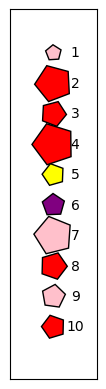

In [50]:
# Task 4

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
import random

# Створення фігури та осей
fig, ax = plt.subplots()

# Вимкнення сітки
ax.set_xticks([])
ax.set_yticks([])

# Кількість правильних п'ятикутників
num_pentagons = 10

# Розташування п'ятикутників в стовпчик
for i in range(num_pentagons):
    # Випадковий радіус і кут повороту для кожного п'ятикутника
    radius = np.random.uniform(0.1, 0.5)
    rotation_angle = np.random.uniform(0, 360)

    # Координати центра п'ятикутника для розташування в стовпчик
    center_x = 0
    center_y = -i * 0.7

    # Випадковий колір
    color = random.choice(['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown'])

    # Створення правильного п'ятикутника
    pentagon = RegularPolygon((center_x, center_y), numVertices=5, radius=radius, orientation=np.radians(rotation_angle), edgecolor='black', facecolor=color)
    
    # Додавання п'ятикутника до графіку
    ax.add_patch(pentagon)

    # Асоціація з номером п'ятикутника
    ax.text(0.5, center_y, str(i+1), ha='center', va='center')

# Налаштування меж осей для наочності
ax.set_xlim(-1, 1)
ax.set_ylim(-num_pentagons * 0.7 - 0.5, 1)
ax.set_aspect('equal')

# Виведення графіку
plt.show()



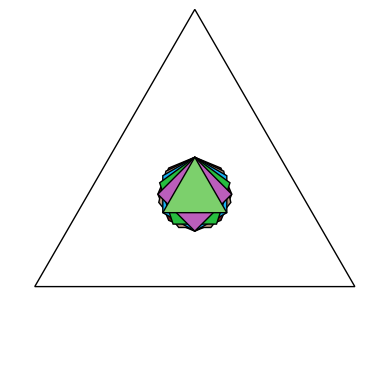

In [59]:
# Task 5

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
import random

# Створення фігури та осей
fig, ax = plt.subplots()

# Розрахунок координат вершин трикутника
A = np.array([0, 0])
B = np.array([6, 0])
C = np.array([3, np.sqrt(27)])

# Додавання трикутника до графіку
triangle = RegularPolygon((A[0], A[1]), numVertices=3, radius=1, edgecolor='black', facecolor='none')
ax.add_patch(triangle)

# Створення списку полігонів з 8, 7, 6, ..., 3 сторонами та розфарбування їх
polygons = []
for sides in range(8, 2, -1):
    # Випадковий колір
    color = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]

    # Створення полігона з заданою кількістю сторін та випадковим кольором
    polygon = RegularPolygon((0, 0), numVertices=sides, radius=0.2, edgecolor='black', facecolor=color)
    
    # Додавання полігона до списку
    polygons.append(polygon)

# Виведення графіку
ax.set_aspect('equal')

# Відобразити полігони на графіку
for polygon in polygons:
    ax.add_patch(polygon)

# Приховати координатну сітку
ax.set_xticks([])
ax.set_yticks([])

# Налаштувати межі для наочності
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Приховати координатні вісі
ax.axis('off')

plt.show()


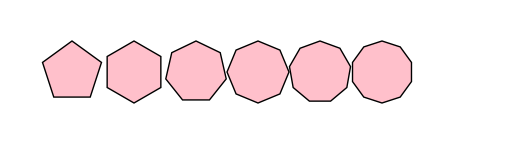

In [61]:
# Task 6

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np

# Створення фігури та осей
fig, ax = plt.subplots()

# Список кількостей сторін для багатокутників
num_sides_list = list(range(5, 11))

# Розмір сторін багатокутників
side_length = 1

# Розташування центра багатокутників
centers = [(i * 2, 0) for i in range(len(num_sides_list))]

# Створення та відображення багатокутників
for num_sides, center in zip(num_sides_list, centers):
    polygon = RegularPolygon(center, numVertices=num_sides, radius=side_length, edgecolor='black', facecolor='pink')
    ax.add_patch(polygon)

# Приховання координатної сітки
ax.set_axis_off()

# Налаштування меж осей для наочності
ax.set_xlim(-2, 14)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

plt.show()



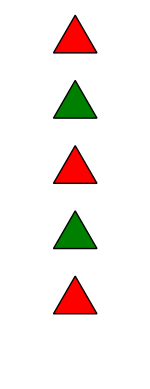

In [66]:
#Task 7: Створіть стовпчик із червоного та зеленого трикутників.

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

# Створення фігури та осей
fig, ax = plt.subplots()

# Розмір трикутника
triangle_size = 1

# Кількість трикутників
num_triangles = 5

# Відстань між трикутниками
distance_between_triangles = 1.5

# Колір трикутника
colors = ['red', 'green']

# Створення трикутників та їх додавання до графіку
for i in range(num_triangles):
    x = 0
    y = -i * distance_between_triangles

    # Координати вершин трикутника
    vertices = np.array([[x, y], [x + triangle_size, y], [x + triangle_size / 2, y + triangle_size * np.sqrt(3) / 2]])

    # Створення та додавання трикутника до графіку
    triangle = Polygon(vertices, edgecolor='black', facecolor=colors[i % len(colors)])
    ax.add_patch(triangle)

# Приховання координатної сітки та осей
ax.set_axis_off()

# Налаштування меж осей для наочності
ax.set_xlim(-1, triangle_size * 2)
ax.set_ylim(-num_triangles * distance_between_triangles, 1)
ax.set_aspect('equal')

plt.show()


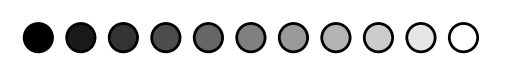

In [3]:
#Task 8: Створіть список, елементами якого є диски з відтінками від 0 до 1 з кроком 0,1

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# Створення фігури та осей
fig, ax = plt.subplots()

# Кількість дисків
num_discs = 11

# Крок відтінків
shade_step = 0.1

# Створення та додавання дисків до графіку
for i in range(num_discs):
    x = i * 1.5  # Відстань між дисками
    y = 0

    # Створення диска з відтінком від 0 до 1
    shade = i * shade_step
    circle = Circle((x, y), radius=0.5, edgecolor='black', facecolor=plt.cm.gray(shade), linewidth=2)
    ax.add_patch(circle)

# Приховання координатної сітки та осей
ax.set_axis_off()

# Налаштування меж осей для наочності
ax.set_xlim(-1, num_discs * 1.5)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

plt.show()



In [10]:
#Task 9: Використайте Manipulate (/в парадігмі Wolfram), щоб показати послідовності цифр із 4-значних цілих чисел (від 1000 до 9999).

import ipywidgets as widgets
from IPython.display import display

# Створення віджету для вибору цифри
digit_selector = widgets.IntSlider(value=1000, min=1000, max=9999, step=1, description='Число:')

# Функція для відображення числа через декоратор 
#(бо якщо просто функцію з вибором цифри то буде нижче виводитись: <function __main__.display_number(number)>)
@widgets.interact(number=digit_selector)
def display_number(number):
    print(number)


interactive(children=(IntSlider(value=1000, description='Число:', max=9999, min=1000), Output()), _dom_classes…